In [76]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize

In [69]:


# List of 30 popular stock symbols
symbols = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "BRK-B", "JPM", "JNJ", "V",
    "PG", "UNH", "HD", "MA", "NVDA", "DIS", "BAC", "ADBE", "CMCSA", "XOM",
    "NFLX", "VZ", "CSCO", "PEP", "INTC", "KO", "WMT", "MRK", "PFE", "T"
]

# Calculate the start date (200 trading days ago)
end_date = datetime.now()
start_date = end_date - timedelta(days=800)  # Using 300 calendar days to ensure we get 200 trading days

# Function to download data for a single stock
def download_stock_data(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    return data['Close']

# Download data for all stocks
stockPrice_df = pd.DataFrame()
for symbol in symbols:
    print(f"Downloading data for {symbol}...")
    stock_data = download_stock_data(symbol)
    stockPrice_df[symbol] = stock_data

# # Ensure we have exactly 200 trading days
# all_data = all_data.tail(200)

# # Save to CSV
# all_data.to_csv("stock_prices_200days.csv")
# print("Data saved to stock_prices_200days.csv")

# # Display the first few rows
# print(all_data.head())

In [70]:
return_pt_df = stockPrice_df.pct_change().dropna()
return_pt_df_cent = return_pt_df - return_pt_df.mean()

In [77]:
mean_return_pt = return_pt_df.mean()

In [75]:
cov_matrix = (return_pt_df_cent.T @ return_pt_df_cent)/(return_pt_df_cent.shape[0]-1)
cov_matrix

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,BRK-B,JPM,JNJ,V,...,NFLX,VZ,CSCO,PEP,INTC,KO,WMT,MRK,PFE,T
AAPL,0.000262,0.000169,0.000182,0.000187,0.000210,2.652188e-04,0.000082,0.000067,2.282022e-05,0.000090,...,0.000180,0.000040,0.000089,0.000039,0.000176,0.000045,0.000045,0.000023,0.000041,0.000038
MSFT,0.000169,0.000274,0.000244,0.000223,0.000274,2.039844e-04,0.000076,0.000064,1.706456e-05,0.000085,...,0.000190,0.000029,0.000088,0.000037,0.000197,0.000041,0.000051,0.000014,0.000048,0.000015
AMZN,0.000182,0.000244,0.000486,0.000281,0.000365,3.141437e-04,0.000088,0.000086,9.669757e-06,0.000097,...,0.000249,0.000039,0.000108,0.000027,0.000238,0.000034,0.000078,0.000007,0.000039,0.000047
GOOGL,0.000187,0.000223,0.000281,0.000398,0.000326,2.268186e-04,0.000086,0.000072,1.800323e-05,0.000084,...,0.000200,0.000042,0.000102,0.000033,0.000195,0.000037,0.000053,0.000019,0.000045,0.000030
META,0.000210,0.000274,0.000365,0.000326,0.000826,2.778198e-04,0.000093,0.000091,1.192415e-05,0.000103,...,0.000283,0.000057,0.000099,0.000022,0.000268,0.000024,0.000048,0.000002,0.000051,0.000035
TSLA,0.000265,0.000204,0.000314,0.000227,0.000278,1.279873e-03,0.000089,0.000128,-3.917778e-07,0.000121,...,0.000288,0.000028,0.000108,0.000042,0.000283,0.000027,0.000074,-0.000019,0.000040,0.000021
BRK-B,0.000082,0.000076,0.000088,0.000086,0.000093,8.941177e-05,0.000104,0.000092,3.984115e-05,0.000067,...,0.000087,0.000043,0.000064,0.000040,0.000096,0.000046,0.000044,0.000035,0.000054,0.000048
JPM,0.000067,0.000064,0.000086,0.000072,0.000091,1.275627e-04,0.000092,0.000195,3.567281e-05,0.000073,...,0.000086,0.000044,0.000069,0.000028,0.000122,0.000038,0.000037,0.000030,0.000057,0.000055
JNJ,0.000023,0.000017,0.000010,0.000018,0.000012,-3.917778e-07,0.000040,0.000036,1.019846e-04,0.000030,...,0.000006,0.000033,0.000034,0.000043,0.000019,0.000040,0.000026,0.000050,0.000068,0.000038
V,0.000090,0.000085,0.000097,0.000084,0.000103,1.210736e-04,0.000067,0.000073,2.988727e-05,0.000135,...,0.000100,0.000037,0.000066,0.000038,0.000097,0.000043,0.000036,0.000028,0.000039,0.000040


array([ 8.48990350e-04,  1.04436644e-03,  9.88838351e-04,  8.58751974e-04,
        2.47458075e-03,  5.62688713e-04,  9.00976307e-04,  1.29374141e-03,
        6.28010825e-05,  5.38026766e-04,  5.25567834e-04,  3.52049723e-04,
        7.06203011e-04,  7.39643402e-04,  4.03772170e-03,  4.68556257e-05,
        5.34119848e-04,  6.90553839e-04,  2.13390615e-04,  7.68007322e-04,
        2.39670224e-03,  2.42297948e-04,  5.19589176e-04,  1.85384052e-04,
       -4.42272096e-04,  4.48426532e-04,  1.20693655e-03,  6.12086193e-04,
       -7.26798091e-04,  6.19462428e-04])

In [88]:
mean_return_np = mean_return_pt.to_numpy()

cov_matrix_np = cov_matrix.to_numpy()

## Optimization

In [90]:
# Portfolio optimization function with L1 penalty and constraints
def portfolio_loss(weights, mean_returns, cov_matrix, risk_aversion, l1_penalty):
    # Calculate portfolio return
    portfolio_return = np.dot(weights, mean_returns)
    
    # Calculate portfolio variance 
    portfolio_variance = np.dot(weights.T, cov_matrix@weights)
    
    # Loss function: negative of return, variance, and L1 penalty
    loss = -portfolio_return + risk_aversion * portfolio_variance + l1_penalty * np.sum(np.abs(weights))
    
    return loss



# Function to optimize the portfolio with multiple constraints
def optimize_portfolio(mean_returns, cov_matrix, risk_aversion=1.0, l1_penalty=0.0,
                       fixed_weights=None, weight_bounds=None, portfolio_size=1,
                       equality_constraints=None, inequality_constraints=None,
                       method='SLSQP'):
    """
    Choice of optimizers: SLSQP (Sequential Least Squares Programming), COBYLA, etc.
    """
    
    num_assets = len(mean_returns)
    
    # Initial guess: Equal weight for each stock
    initial_weights = portfolio_size*np.ones(num_assets) / num_assets

    # Apply fixed weights (if any), set initial guess and bounds
    if fixed_weights is not None:
        for i, fixed_weight in fixed_weights.items():
            initial_weights[i] = fixed_weight
    
    # Bounds: If not specified, set default bounds to (0, 1)
    if weight_bounds is None:
        bounds = [(0, 1) for _ in range(num_assets)]
    else:
        bounds = [(weight_bounds[i][0], weight_bounds[i][1]) if i in weight_bounds else (0, 1) for i in range(num_assets)]
    
    # Ensure fixed weights by adjusting bounds to fix those specific weights
    if fixed_weights is not None:
        for i, fixed_weight in fixed_weights.items():
            bounds[i] = (fixed_weight, fixed_weight)  # Fix weight to the specified value

    # Constraints: List of equality and inequality constraints
    constraints = []

    # Equality constraints (weights sum to portfolio_size is a default equality constraint)
    if equality_constraints is None:
        constraints.append({'type': 'eq', 'fun': lambda weights: np.sum(weights) - portfolio_size})
    else:
        # Add custom equality constraints
        for eq in equality_constraints:
            constraints.append({'type': 'eq', 'fun': eq})

    # Inequality constraints (optional, non-negative values mean they are satisfied)
    if inequality_constraints is not None:
        for ineq in inequality_constraints:
            constraints.append({'type': 'ineq', 'fun': ineq})
    
    # Perform optimization using specified method
    result = minimize(portfolio_loss,
                      initial_weights,
                      args=(mean_returns, cov_matrix, risk_aversion, l1_penalty),
                      method=method,
                      bounds=bounds,
                      constraints=constraints)
    
    return result

In [95]:



portfolio_size = 1
# Example data (mean returns and covariance matrix)
mean_returns = np.array([0.12, 0.10, 0.15, 0.07])
cov_matrix = np.array([[0.005, -0.010, 0.004, 0.002],
                       [-0.010, 0.040, -0.002, 0.003],
                       [0.004, -0.002, 0.023, 0.002],
                       [0.002, 0.003, 0.002, 0.018]])

# Risk aversion parameter and L1 penalty
risk_aversion = 0.5  # Adjust this to control the risk tolerance
l1_penalty = 0.0     # L1 penalty to promote sparsity in portfolio weights

# Example fixed weights: Fix the weight of Stock 1 (index 0) to 0.3
fixed_weights = {0: 0.3}

# Example bounds: Set bounds for certain stocks
weight_bounds = {1: (0.1, 0.5), 3: (0.0, 0.2)}  # Stock 2 between 10% and 50%, Stock 4 between 0% and 20%

# Example equality constraint: Ensure sum of weights is 1 (default behavior)
equality_constraints = [lambda weights: np.sum(weights) - 1]

# Example inequality constraint: Ensure that at least 40% of the portfolio is invested in stocks 2 and 3 combined
inequality_constraints = [lambda weights: np.sum(weights[1:3]) - 0.4]

# Optimizer options: 'SLSQP', 'COBYLA', etc.
method = 'SLSQP'

# Optimize portfolio
optimal_portfolio = optimize_portfolio(mean_returns, cov_matrix, risk_aversion, l1_penalty, 
                                       fixed_weights=fixed_weights, weight_bounds=weight_bounds, 
                                       equality_constraints=equality_constraints, 
                                       portfolio_size=portfolio_size,
                                       inequality_constraints=inequality_constraints, 
                                       method=method)

# Output the results
print("Optimal Weights:", optimal_portfolio.x)
print("Optimal Loss:", optimal_portfolio.fun)
print("Success:", optimal_portfolio.success)


Optimal Weights: [0.3 0.1 0.6 0. ]
Optimal Loss: -0.131135
Success: True


<Axes: xlabel='Date'>

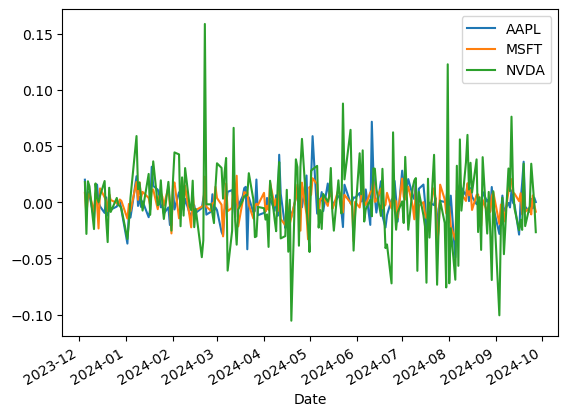

In [41]:
return_pt_df_cent[["AAPL", "MSFT", "NVDA"]].plot()

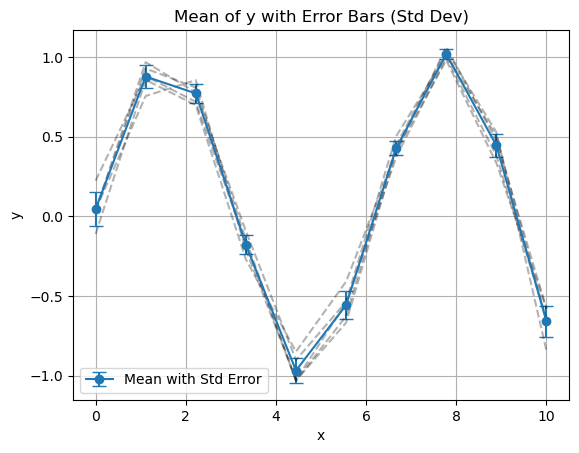

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.linspace(0, 10, 10)  # x-axis values
# Simulating multiple realizations of y (e.g., 5 realizations)
y_realizations = np.array([np.sin(x) + np.random.normal(0, 0.1, len(x)) for _ in range(5)])

# Calculate the mean and standard deviation across realizations
y_mean = np.mean(y_realizations, axis=0)
y_std = np.std(y_realizations, axis=0)

# Plot mean with error bars (standard deviation)
plt.errorbar(x, y_mean, yerr=y_std, fmt='-o', label='Mean with Std Error', capsize=5)

# Optional: Plot individual realizations for reference (to visualize spread)
for y_real in y_realizations:
    plt.plot(x, y_real, 'k--', alpha=0.3)

# Customize the plot
plt.title('Mean of y with Error Bars (Std Dev)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [111]:
ab = [[1, 2, 3]]

In [112]:
ab.append([0,30,4])

In [113]:
np.array(ab).shape

(2, 3)

In [ ]:
np.min

In [80]:
return_pt_df["AAPL"].sum()

0.46694469246163905

In [103]:
y_mean.shape

(10,)

In [99]:
y_realizations.shape

(5, 10)